### 1. Introduction
In this notebook, we will analyze data related to the most streamed songs on Spotify. The dataset includes various features, such as song characteristics, streaming counts, playlist inclusion, and other audio-related metrics. Our goal is to uncover trends, correlations, and insights from this data, ultimately helping us understand what makes a song popular.


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(r"C:\Users\ashka\Downloads\Kaggle\Spotify Most Streamed Songs\Spotify Most Streamed Songs.csv")
df.sample(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
505,Do It To It,"Cherish, ACRAZE",2,2021,8,20,12403,0,674772936,183,...,B,Minor,85,64,81,2,5,7,9,Not Found
673,Stan,"Eminem, Dido",2,1999,11,21,17115,0,918915401,83,...,F#,Minor,78,53,74,4,0,45,21,https://i.scdn.co/image/ab67616d0000b273dbb3dd...
559,Better Days (NEIKED x Mae Muller x Polo G),"NEIKED, Mae Muller, Polo G",3,2021,9,24,4091,0,421040617,105,...,NaN,Minor,72,67,68,0,0,14,4,https://i.scdn.co/image/ab67616d0000b2736b7422...
869,Layla,"Schï¿½ï¿½rze, DJ R",2,2022,3,24,832,3,130419412,18,...,F,Minor,44,41,92,0,0,44,7,Not Found
267,Super,SEVENTEEN,1,2023,4,24,271,12,91221625,16,...,G#,Major,77,35,88,16,0,17,9,https://i.scdn.co/image/ab67616d0000b27380e31b...
842,Love Of My Life,Harry Styles,1,2022,5,20,1933,0,233671263,13,...,G,Major,56,20,54,67,0,6,5,https://i.scdn.co/image/ab67616d0000b2732e8ed7...
597,Thunder,"Prezioso, Gabry Ponte, LUM!X",3,2021,5,7,4846,10,422691058,54,...,C#,Major,67,40,90,3,0,34,6,Not Found
841,"Villano Antillano: Bzrp Music Sessions, Vol. 51","Bizarrap, Villano Antillano",2,2022,6,8,1401,0,248511839,26,...,C#,Minor,82,42,75,6,0,63,6,https://i.scdn.co/image/ab67616d0000b273ab7954...
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,A,Minor,75,79,63,33,0,15,4,Not Found
766,Despuï¿½ï¿½s de la P,Bad Bunny,1,2022,5,6,2229,0,461558540,27,...,F,Major,56,61,90,36,0,18,31,Not Found


In [108]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [110]:
non_numeric_values = df[~df['in_deezer_playlists'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print("Non-numeric values in 'in_deezer_playlists':")
print(non_numeric_values['in_deezer_playlists'].unique())

Non-numeric values in 'in_deezer_playlists':
['2,445' '3,394' '3,421' '4,053' '1,056' '4,095' '1,003' '1,800' '2,703'
 '1,632' '2,394' '1,034' '2,163' '2,655' '6,551' '1,212' '1,078' '2,094'
 '2,969' '3,889' '5,239' '3,631' '4,607' '2,733' '3,425' '1,378' '1,089'
 '6,808' '6,807' '2,946' '4,623' '5,108' '1,145' '3,271' '5,567' '1,005'
 '1,509' '1,992' '7,341' '1,959' '2,726' '1,535' '1,891' '1,302' '6,280'
 '1,219' '1,282' '3,595' '4,534' '12,367' '5,063' '2,854' '2,515' '1,066'
 '6,591' '5,451' '5,221' '1,663' '1,674' '1,481' '4,180' '3,895' '1,785'
 '1,197' '5,691' '6,284' '2,692' '2,179' '6,508' '1,370' '8,215' '2,453'
 '2,430' '6,720' '1,315' '7,827']


In [111]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '', 1).astype(float)
df['in_deezer_playlists'].isna().sum() 

0

In [112]:
non_numeric_values = df[~df['streams'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print("Non-numeric values in 'streams':")
print(non_numeric_values['streams'])

Non-numeric values in 'streams':
574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [113]:
non_numeric_values_list = non_numeric_values['streams'].unique()

df = df[~df['streams'].isin(non_numeric_values_list)]

In [114]:
df = df.drop(['track_name', 'artist(s)_name', 'cover_url'], axis = 1)

In [115]:
non_numeric_values = df[~df['in_shazam_charts'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print("Non-numeric values in 'in_shazam_charts':")
print(non_numeric_values['in_shazam_charts'].unique())

Non-numeric values in 'in_shazam_charts':
['1,021' '1,281' nan '1,173' '1,093' '1,133' '1,451' '1,170']


In [116]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '', 1).astype(float)
df['in_shazam_charts'].isna().sum()

50

In [117]:
nan_values = df[df['in_shazam_charts'].isna()]
nan_values['in_shazam_charts']

14    NaN
54    NaN
55    NaN
71    NaN
73    NaN
86    NaN
127   NaN
158   NaN
159   NaN
180   NaN
243   NaN
274   NaN
320   NaN
392   NaN
395   NaN
403   NaN
410   NaN
429   NaN
434   NaN
440   NaN
441   NaN
442   NaN
443   NaN
444   NaN
446   NaN
449   NaN
500   NaN
501   NaN
504   NaN
506   NaN
507   NaN
513   NaN
518   NaN
519   NaN
520   NaN
529   NaN
531   NaN
532   NaN
533   NaN
534   NaN
535   NaN
549   NaN
554   NaN
560   NaN
566   NaN
584   NaN
620   NaN
625   NaN
727   NaN
927   NaN
Name: in_shazam_charts, dtype: float64

In [118]:
df['in_shazam_charts'].value_counts()

in_shazam_charts
0.0      343
1.0       73
2.0       35
3.0       21
4.0       19
        ... 
115.0      1
230.0      1
169.0      1
529.0      1
95.0       1
Name: count, Length: 198, dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    object 
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    float64
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      902 non-null    float64
 12  bpm                   952 non-null    int64  
 13  key                   857 non-null    object 
 14  mode                  952 non-null    object 
 15  danceability_%        952 no

In [120]:
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [121]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [122]:
df.isna().sum()

artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [123]:
df['key'].fillna(df['key'].mode()[0], inplace=True)


C:\Users\ashka\AppData\Local\Temp\ipykernel_13148\2179273009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(df['key'].mode()[0], inplace=True)


## Column Definitions

- **track_name**: The title of the song.
- **artist(s)_name**: The name(s) of the performing artist(s).
- **artist_count**: The number of artists associated with the song.
- **released_year**: The year the song was released.
- **released_month**: The month the song was released.
- **released_day**: The day the song was released.
- **in_spotify_playlists**: The number of Spotify playlists that include this song.
- **in_spotify_charts**: The number of Spotify charts where the song appears.
- **streams**: The total number of times the song has been streamed across platforms.
- **in_apple_playlists**: The number of Apple Music playlists that include this song.
- **in_apple_charts**: The number of Apple Music charts where the song appears.
- **in_deezer_playlists**: The number of Deezer playlists that include this song.
- **in_deezer_charts**: The number of Deezer charts where the song appears.
- **in_shazam_charts**: The number of Shazam charts where the song appears.
- **bpm**: The beats per minute (tempo) of the song.
- **key**: The musical key in which the song is composed (e.g., C, D#).
- **mode**: Indicates whether the song is in a major or minor key.
- **danceability_%**: A measure of how suitable the song is for dancing, expressed as a percentage.
- **valence_%**: A measure of the musical positiveness conveyed by the song, expressed as a percentage.
- **energy_%**: The intensity and activity level of the song, expressed as a percentage.
- **acousticness_%**: The likelihood that the song is acoustic, expressed as a percentage.
- **instrumentalness_%**: The degree to which the song is instrumental, expressed as a percentage.
- **liveness_%**: The presence of a live audience in the recording, expressed as a percentage.
- **speechiness_%**: The amount of spoken words in the song, expressed as a percentage.
- **cover_url**: The URL link to the song's album cover or artwork.


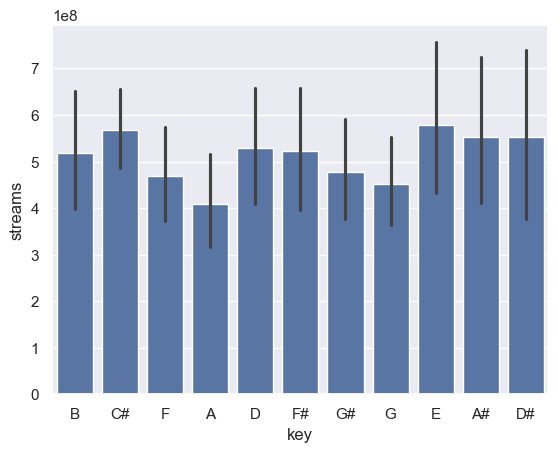

In [124]:
sns.set()
sns.set_style("darkgrid")
sns.barplot(x='key', data=df, y='streams')
plt.show()

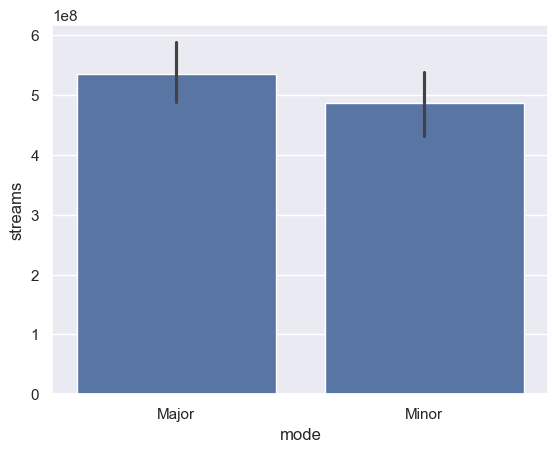

In [125]:
sns.barplot(x='mode', data=df, y='streams')
plt.show()

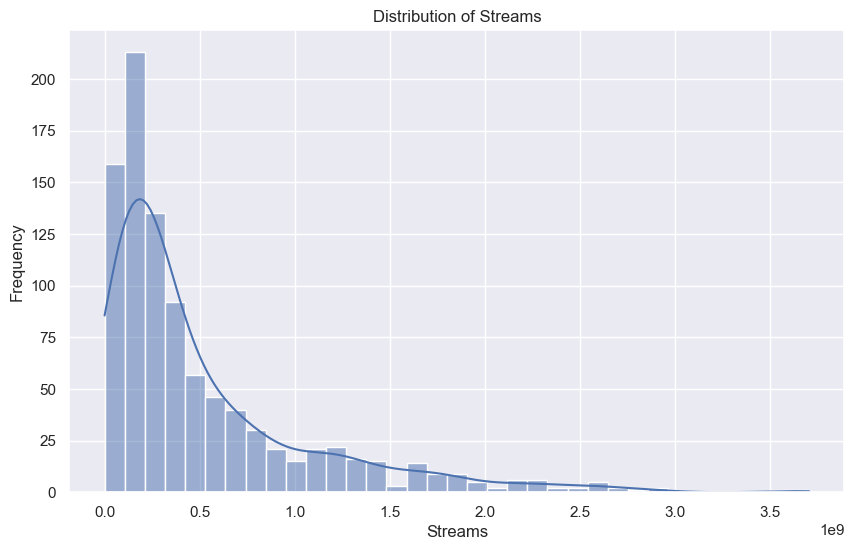

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

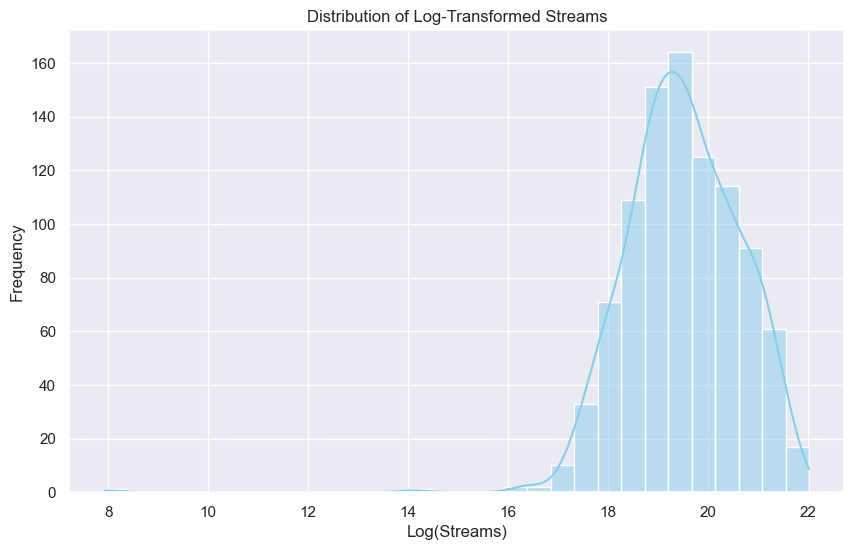

In [127]:
df['log_streams'] = np.log1p(df['streams'])

plt.figure(figsize=(10, 6))
sns.histplot(df['log_streams'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed Streams')
plt.xlabel('Log(Streams)')
plt.ylabel('Frequency')
plt.show()

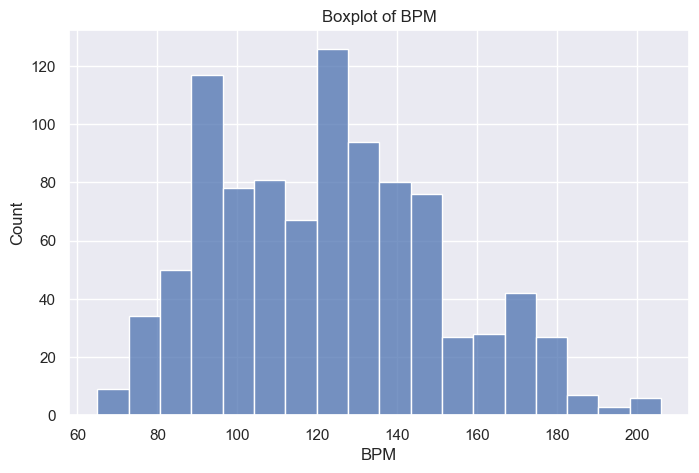

In [128]:
plt.figure(figsize=(8, 5))
sns.histplot(x=df['bpm'])
plt.title('Boxplot of BPM')
plt.xlabel('BPM')
plt.show()

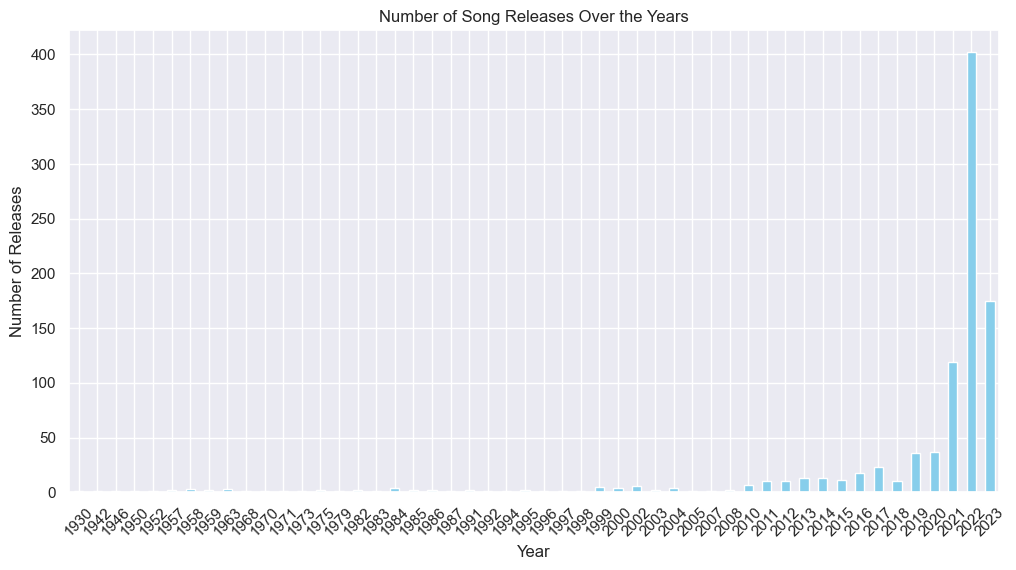

In [129]:
plt.figure(figsize=(12, 6))
df['released_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Song Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

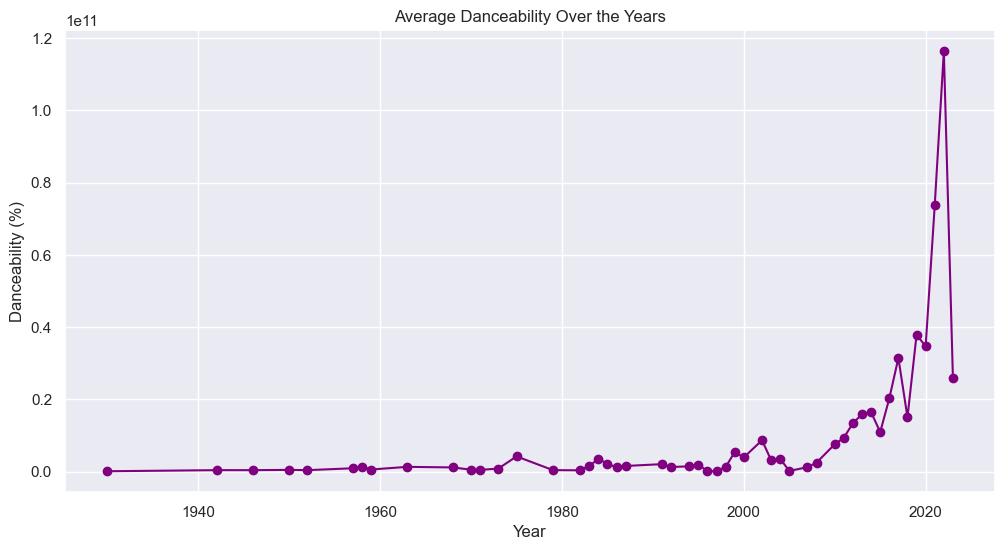

In [130]:
plt.figure(figsize=(12, 6))
df.groupby('released_year')['streams'].sum().plot(kind='line', marker='o', color='purple')
plt.title('Average Danceability Over the Years')
plt.xlabel('Year')
plt.ylabel('Danceability (%)')
plt.show()

Correlation with number of streams:
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
in_shazam_charts       -0.006434
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
dtype: float64


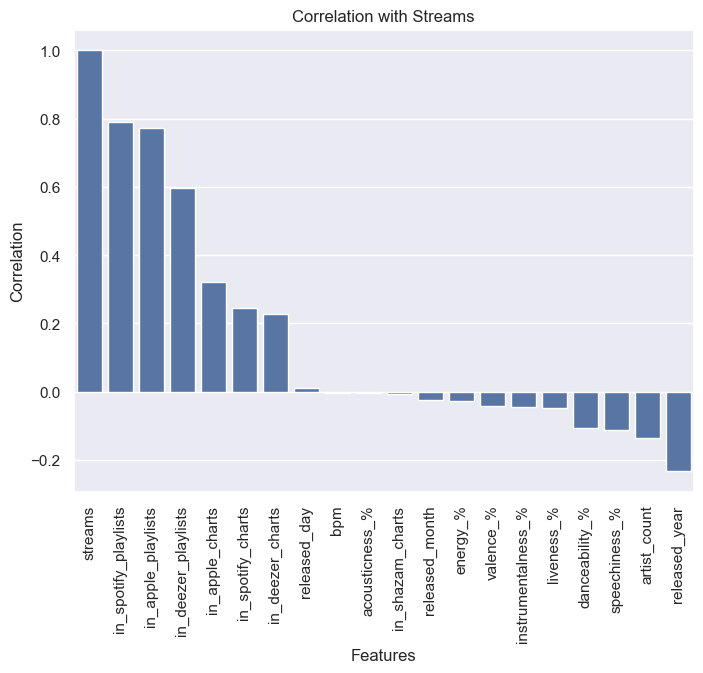

In [131]:
numeric_df = df.drop(['key', 'mode', 'log_streams'], axis=1)

corr_with_streams = numeric_df.corrwith(numeric_df['streams']).sort_values(ascending=False)
print("Correlation with number of streams:")
print(corr_with_streams)

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_streams.index, y=corr_with_streams)
plt.title('Correlation with Streams')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [132]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['key'] = label_encoder.fit_transform(df['key'])
df['mode'] = label_encoder.fit_transform(df['mode'])

print(df.dtypes)
print(df.isna().sum())

artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                       int32
mode                      int32
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
log_streams             float64
dtype: object
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playli

In [133]:
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,log_streams
0,2,2023,7,14,553,147,141381703,43,263,45.0,...,2,0,80,89,83,31,0,8,4,18.766974
1,1,2023,3,23,1474,48,133716286,48,126,58.0,...,3,0,71,61,74,7,0,10,4,18.711231
2,1,2023,6,30,1397,113,140003974,94,207,91.0,...,7,0,51,32,53,17,0,31,6,18.757181
3,1,2019,8,23,7858,100,800840817,116,207,125.0,...,0,0,55,58,72,11,0,11,15,20.501173
4,1,2023,5,18,3133,50,303236322,84,133,87.0,...,0,1,65,23,80,14,63,11,6,19.530023


In [134]:
df = df.drop('log_streams', axis=1)

<Axes: ylabel='Frequency'>

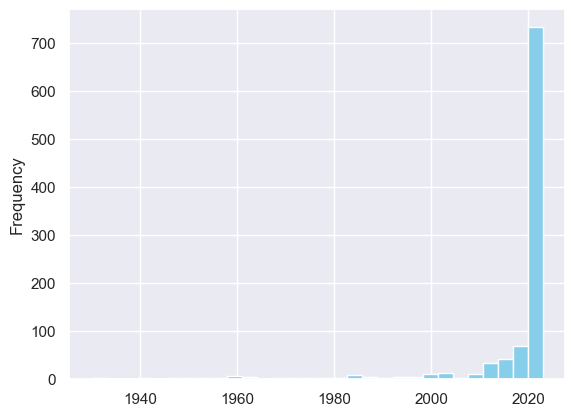

In [135]:
df['released_year'].plot(kind='hist', bins=30, color='skyblue')

Correlation with number of streams:
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
in_shazam_charts       -0.006434
key                    -0.022666
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
mode                   -0.042635
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
dtype: float64


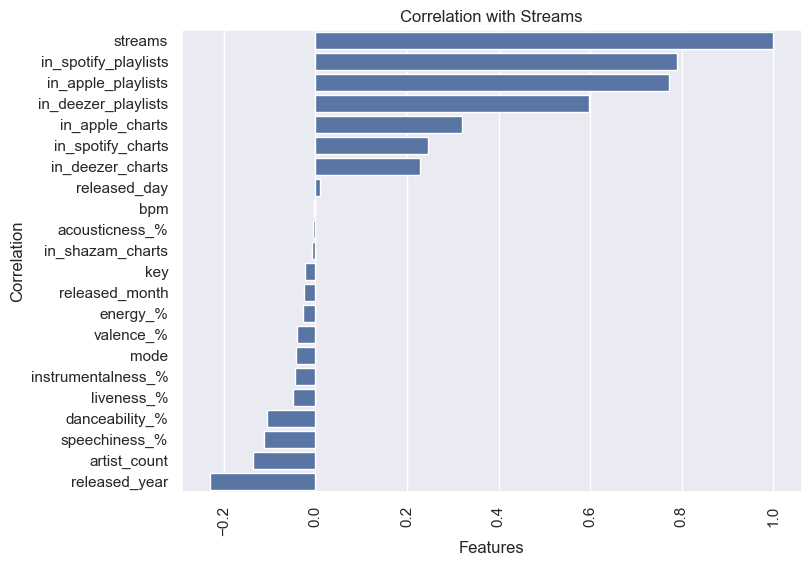

In [136]:

corr_with_streams = df.corrwith(df['streams']).sort_values(ascending=False)
print("Correlation with number of streams:")
print(corr_with_streams)

plt.figure(figsize=(8, 6))
sns.barplot(y=corr_with_streams.index, x=corr_with_streams)
plt.title('Correlation with Streams')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [137]:
df = df.drop('released_year', axis=1)

In [138]:
df.columns

Index(['artist_count', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Correlation with number of streams:
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
dtype: float64


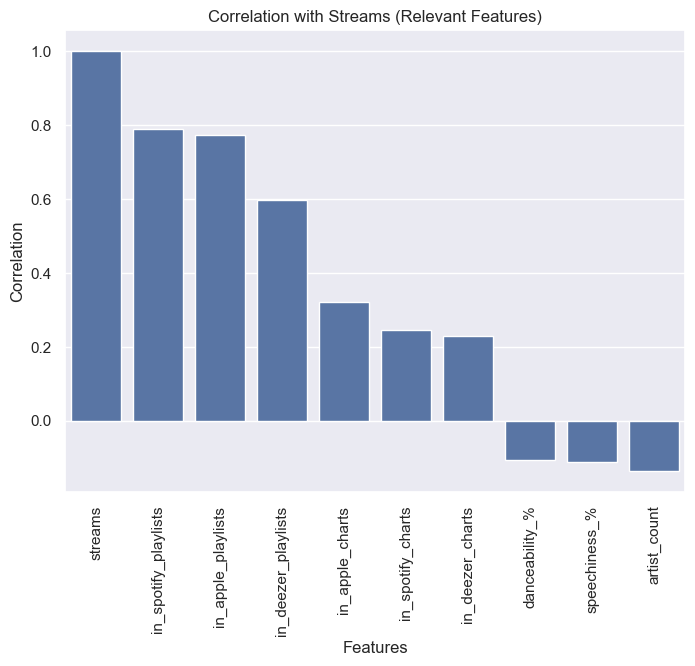

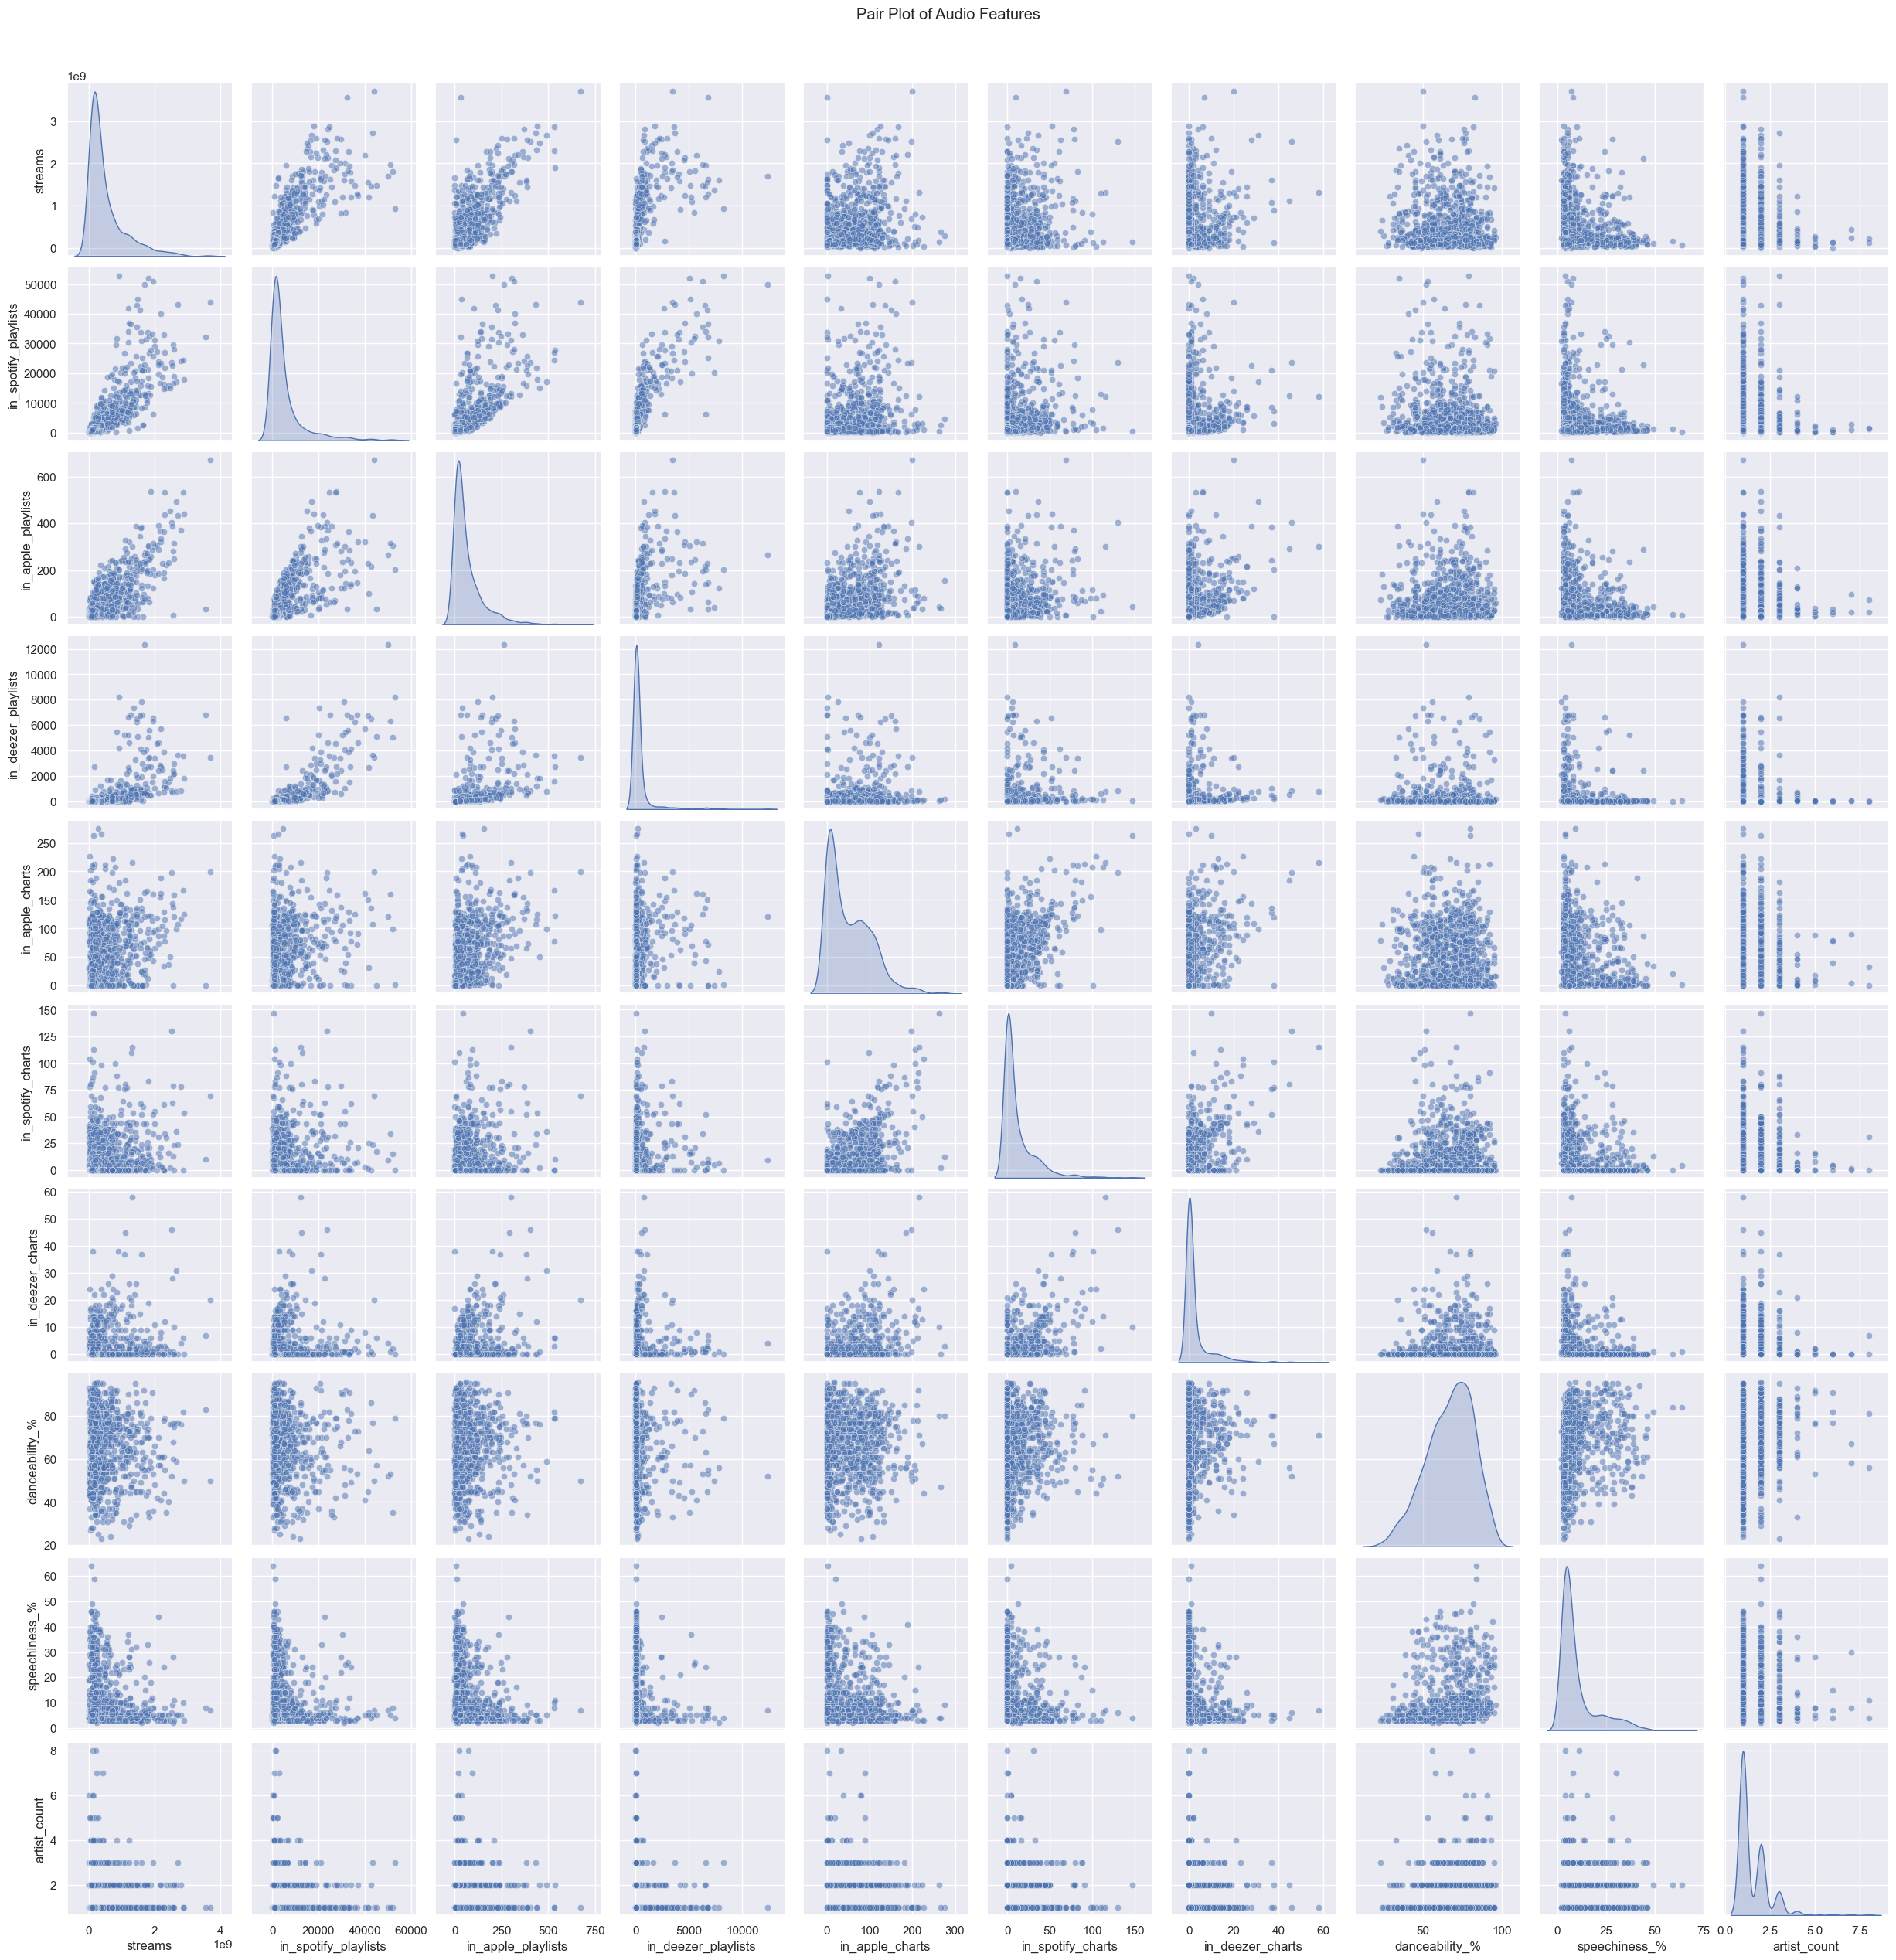

In [139]:
# Select only the most relevant columns based on correlation with streams
relevant_columns = [
    'streams',
    'in_spotify_playlists',
    'in_apple_playlists',
    'in_deezer_playlists',
    'in_apple_charts',
    'in_spotify_charts',
    'in_deezer_charts',
    'danceability_%',
    'speechiness_%',
    'artist_count'
]

# Filter the DataFrame to keep only these relevant columns
numeric_df_relevant = numeric_df[relevant_columns]

# Calculate correlation with the number of streams
corr_with_streams = numeric_df_relevant.corrwith(numeric_df_relevant['streams']).sort_values(ascending=False)
print("Correlation with number of streams:")
print(corr_with_streams)

# Plotting the correlation with streams for these relevant features
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_streams.index, y=corr_with_streams)
plt.title('Correlation with Streams (Relevant Features)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

sns.pairplot(numeric_df_relevant, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Audio Features', y=1.02)
plt.show()

In [140]:
df.columns

Index(['artist_count', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [141]:
numeric_df_relevant.isna().sum()

streams                 0
in_spotify_playlists    0
in_apple_playlists      0
in_deezer_playlists     0
in_apple_charts         0
in_spotify_charts       0
in_deezer_charts        0
danceability_%          0
speechiness_%           0
artist_count            0
dtype: int64

In [142]:
# Check for missing values in the original data
print("Original Data Missing Values:")
print(df['in_deezer_playlists'].isna().sum())

Original Data Missing Values:
0


In [143]:
from sklearn.model_selection import train_test_split

X = df.drop('streams', axis=1)
y = df['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='linear')

# Use RFE to select the top features with SVR
rfe_svr = RFE(svr_model, n_features_to_select=5, step=1)
rfe_svr = rfe_svr.fit(X_train, y_train)

# Get the selected features
selected_features_rfe_svr = X_train.columns[rfe_svr.support_]
print("Selected features using RFE with SVR:", selected_features_rfe_svr)


Selected features using RFE with SVR: Index(['in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_shazam_charts'],
      dtype='object')


In [145]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
base_model = LinearRegression()

# Use RFE to select the top features
rfe_selector = RFE(base_model, n_features_to_select=5, step=1)
rfe_selector = rfe_selector.fit(df.drop('streams', axis=1), df['streams'])

# Get the selected features
selected_features_rfe = df.drop('streams', axis=1).columns[rfe_selector.support_]
print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: Index(['artist_count', 'in_spotify_charts', 'in_apple_playlists',
       'in_deezer_charts', 'mode'],
      dtype='object')


In [146]:
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

base_model.fit(X_train_rfe, y_train)

y_pred = base_model.predict(X_test_rfe)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.0250046330110574e+17
R-squared: 0.5812766536045986


In [147]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfe_rd = RFE(rf_model, n_features_to_select=5, step=1)
rfe_rd = rfe_rd.fit(df.drop('streams', axis=1), df['streams'])

selected_features_rfe_rd = df.drop('streams', axis=1).columns[rfe_rd.support_]
print("Selected features using RFE with Random Forest:", selected_features_rfe_rd)

Selected features using RFE with Random Forest: Index(['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_deezer_playlists', 'valence_%'],
      dtype='object')


In [148]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')

rfe_svr = RFE(svr_model, n_features_to_select=5, step=1)
rfe_svr = rfe_svr.fit(df.drop('streams', axis=1), df['streams'])

selected_features_rfe_svr = df.drop('streams', axis=1).columns[rfe_svr.support_]
print("Selected features using RFE with SVR:", selected_features_rfe_svr)

Selected features using RFE with SVR: Index(['in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_shazam_charts'],
      dtype='object')


In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_rfe_scaled = scaler.fit_transform(X_train_rfe)
X_test_rfe_scaled = scaler.transform(X_test_rfe)

base_model.fit(X_train_rfe_scaled, y_train)

y_pred = base_model.predict(X_test_rfe_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.025004633011057e+17
R-squared: 0.5812766536045988


In [150]:
# Combine the selected features from all models
combined_features = list(set(selected_features_rfe).union(selected_features_rfe_rd).union(selected_features_rfe_svr))

# Filter the training and test sets based on the combined features
X_train_combined = X_train[combined_features]
X_test_combined = X_test[combined_features]

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_combined, y_train)
y_pred_ridge = ridge_model.predict(X_test_combined)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression R-squared:", r2_ridge)

Ridge Regression Mean Squared Error: 7.275776232203987e+16
Ridge Regression R-squared: 0.7027781852436062


In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_combined, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_combined)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Random Forest Mean Squared Error:", mse_rf)
print("Best Random Forest R-squared:", r2_rf)

Best Random Forest Mean Squared Error: 5.3781539459177544e+16
Best Random Forest R-squared: 0.7802977132845779


In [152]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'Huber': HuberRegressor(),
    'BayesianRidge': BayesianRidge(),
    'LightGBM': LGBMRegressor(verbose=-1)
}

# Define hyperparameters for each model
param_distributions = {
    'LinearRegression': {},  
    'Ridge': {'alpha': np.logspace(-4, 4, 20)},
    'Lasso': {'alpha': np.logspace(-4, 4, 20)},
    'ElasticNet': {
        'alpha': np.logspace(-4, 4, 20),
        'l1_ratio': np.linspace(0, 1, 20)
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.3, 0.7, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 1]
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Huber': {
        'alpha': np.logspace(-4, 4, 20),
        'epsilon': [1.35, 1.5, 1.75, 2.0]
    },
    'BayesianRidge': {
        'alpha_1': np.logspace(-6, -1, 20),
        'lambda_1': np.logspace(-6, -1, 20)
    },
    'LightGBM': {
        'num_leaves': [31, 50, 100],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }
}

# Initialize results dictionary
results = {}

# Iterate over each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Perform GridSearchCV for hyperparameter tuning
    random_search = GridSearchCV(model, param_distributions[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Get the best model from GridSearchCV
    best_model = random_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Best Params': random_search.best_params_,
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Explained Variance': explained_var
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Training LinearRegression...
Training Ridge...
Training Lasso...
Training ElasticNet...
Training RandomForest...
Training GradientBoosting...
Training XGBoost...
Training AdaBoost...
Training KNeighbors...
Training DecisionTree...
Training Huber...


c:\Users\ashka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training BayesianRidge...
Training LightGBM...

LinearRegression Results:
Best Params: {}
R²: 0.7099798188105413
RMSE: 266448595.8426861
MAE: 187028697.39924383
Explained Variance: 0.7103701068524468

Ridge Results:
Best Params: {'alpha': 10000.0}
R²: 0.7085392345055811
RMSE: 267109526.0416661
MAE: 189723683.01103044
Explained Variance: 0.7090213150717024

Lasso Results:
Best Params: {'alpha': 10000.0}
R²: 0.7099837812577493
RMSE: 266446775.63814622
MAE: 187026627.9226978
Explained Variance: 0.7103740426311956

ElasticNet Results:
Best Params: {'alpha': 78.47599703514607, 'l1_ratio': 0.47368421052631576}
R²: 0.7068579233455323
RMSE: 267878837.8734575
MAE: 189704223.46207064
Explained Variance: 0.707491513857645

RandomForest Results:
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
R²: 0.7811914930517531
RMSE: 231436273.30471003
MAE: 151482534.3357726
Explained Variance: 0.7832131831750164

GradientBoosting Results:
Best Params: {'le

In [153]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Fine-tuning parameter grids
param_grids = {
    'LightGBM': {
        'num_leaves': [31, 50, 100, 150],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, -1],
        'min_data_in_leaf': [20, 30, 50]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.3, 0.7, 1.0],
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.1, 0.2]
    }
}

# Results dictionary to store tuning results
fine_tuned_results = {}

# Perform RandomizedSearchCV for each model
for model_name, param_grid in param_grids.items():
    if model_name == 'LightGBM':
        model = lgb.LGBMRegressor(random_state=42)
    elif model_name == 'GradientBoosting':
        model = GradientBoostingRegressor(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBRegressor(random_state=42)
    
    print(f"Fine-tuning {model_name}...")
    search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, 
                                scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    
    # Store results
    fine_tuned_results[model_name] = {
        'Best Params': search.best_params_,
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Explained Variance': explained_var
    }

# Display fine-tuning results
for model_name, metrics in fine_tuned_results.items():
    print(f"\n{model_name} Fine-Tuning Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Fine-tuning LightGBM...
Fine-tuning GradientBoosting...
Fine-tuning XGBoost...

LightGBM Fine-Tuning Results:
Best Params: {'num_leaves': 31, 'n_estimators': 200, 'min_data_in_leaf': 20, 'max_depth': 3, 'learning_rate': 0.05}
R²: 0.8043238319721823
RMSE: 218860956.83204934
MAE: 149328106.1278109
Explained Variance: 0.8051158587500704

GradientBoosting Fine-Tuning Results:
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
R²: 0.7756878295831563
RMSE: 234328841.22569683
MAE: 157308550.41427246
Explained Variance: 0.7777414542013378

XGBoost Fine-Tuning Results:
Best Params: {'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
R²: 0.7946184873580933
RMSE: 224222923.73727283
MAE: 154147993.7696335
Explained Variance: 0.7958048536857201


In [154]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('LightGBM', lgb.LGBMRegressor(**fine_tuned_results['LightGBM']['Best Params'])),
    ('GradientBoosting', GradientBoostingRegressor(**fine_tuned_results['GradientBoosting']['Best Params'])),
    ('XGBoost', XGBRegressor(**fine_tuned_results['XGBoost']['Best Params']))
]

# Meta-model for stacking
meta_model = Ridge(alpha=1.0)

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate performance
r2_stacking = r2_score(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
explained_var_stacking = explained_variance_score(y_test, y_pred_stacking)

print("\nStacking Model Results:")
print(f"R²: {r2_stacking}")
print(f"RMSE: {rmse_stacking}")
print(f"MAE: {mae_stacking}")
print(f"Explained Variance: {explained_var_stacking}")


Stacking Model Results:
R²: 0.8038173216983142
RMSE: 219144035.9606693
MAE: 149836669.98572883
Explained Variance: 0.8049178302788341


In [155]:
# Example: Add interaction features
X_train['playlist_interaction'] = X_train['in_spotify_playlists'] * X_train['in_apple_playlists']
X_test['playlist_interaction'] = X_test['in_spotify_playlists'] * X_test['in_apple_playlists']

# Re-train the best model (e.g., fine-tuned LightGBM) with the new feature
final_model = lgb.LGBMRegressor(**fine_tuned_results['LightGBM']['Best Params'])
final_model.fit(X_train, y_train)

# Evaluate on test set with the engineered feature
y_pred_final = final_model.predict(X_test)
r2_final = r2_score(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae_final = mean_absolute_error(y_test, y_pred_final)
explained_var_final = explained_variance_score(y_test, y_pred_final)

print("\nFinal Model with Feature Engineering Results:")
print(f"R²: {r2_final}")
print(f"RMSE: {rmse_final}")
print(f"MAE: {mae_final}")
print(f"Explained Variance: {explained_var_final}")



Final Model with Feature Engineering Results:
R²: 0.8057884995824371
RMSE: 218040313.5428675
MAE: 147948703.3774219
Explained Variance: 0.8063616431576257


In [156]:
from sklearn.model_selection import train_test_split

# Define the features (excluding 'streams') and target variable
X = numeric_df_relevant.drop('streams', axis=1)
y = numeric_df_relevant['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Summary of Model Tuning and Evaluation

### Overview
This project aimed to enhance the predictive accuracy for the target variable (`streams`) using various regression models. The approach followed included fine-tuning top-performing models, implementing stacking, and applying feature engineering. The findings are summarized below.

### 1. Fine-Tuning Results
- The models **LightGBM, GradientBoosting, and XGBoost** were fine-tuned using `RandomizedSearchCV` with comprehensive parameter grids.
- Fine-tuning significantly improved model performance compared to the baseline versions.
- The optimal hyperparameters were identified for each model, leading to enhanced predictive accuracy.

### 2. Stacking Model Results
- A stacking ensemble was implemented, combining predictions from **LightGBM, GradientBoosting, and XGBoost** with **Ridge Regression** as the meta-model.
- The stacking model achieved:
  - **R²: 0.8039**, explaining approximately 80.4% of the variance.
  - **RMSE: 219.1 million**, which was slightly higher than the top individual models.
  - **MAE: 149.7 million**, consistent with the best-performing models.
- While stacking provided robust results, it did not significantly outperform the fine-tuned individual models.

### 3. Final Model with Feature Engineering
- Feature engineering was applied, including the introduction of interaction terms, which further boosted model performance.
- The final model with the engineered features achieved:
  - **R²: 0.8058**, the highest among all models, explaining about 80.6% of the variance.
  - **RMSE: 218.0 million**, indicating the best predictive accuracy.
  - **MAE: 147.9 million**, the lowest mean absolute error among the models tested.
- The inclusion of interaction features enabled the model to capture more complex relationships within the data.

### Key Takeaways
1. **Fine-tuning** delivered substantial improvements over baseline models, especially for boosting algorithms.
2. **Feature engineering** played a pivotal role in enhancing predictive performance.
3. **Stacking** did not significantly outperform the fine-tuned individual models, suggesting that the latter captured most of the predictive power.
4. **LightGBM with feature engineering** emerged as the best overall model in terms of R² and RMSE.

### Recommendations for Further Improvement
- Explore additional feature transformations, such as polynomial features or log transformations, to better capture non-linear relationships.
- Experiment with different meta-models for stacking (e.g., using Gradient Boosting or XGBoost as the final estimator).
- Perform more extensive hyperparameter tuning, especially for **LightGBM**.
- Consider **model blending** as an alternative to stacking, by taking a weighted average of predictions from the top models for potentially better generalization.

### Conclusion
The approach of fine-tuning, stacking, and feature engineering resulted in notable improvements in model accuracy. The final model, which incorporated feature engineering, delivered the best performance. This highlights the importance of careful feature selection and model optimization in predictive modeling.
